In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

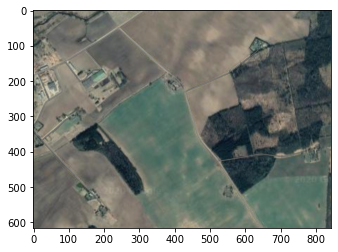

In [2]:
image=cv2.imread("map.png")
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
image10=image//75*75
gray10=cv2.cvtColor(image10,cv2.COLOR_RGB2GRAY)
plt.imshow(image)

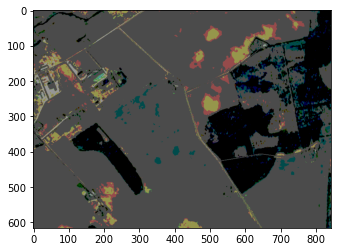

In [3]:
plt.imshow(image10)

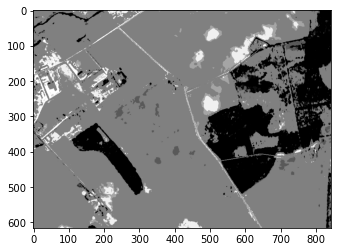

In [4]:
plt.imshow(gray10,cmap="gray")

In [5]:
def Clusteringtest1(image, ranges=5):
    ranges=ranges-1
    colours=[]
    forRecolour=[]
    size=image.shape
    newimage=image.copy()
    normalizer=(np.max(image)-np.min(image))/ranges
    for y in range(size[0]):
        for x in range(size[1]):
            normalized=image[y][x]//normalizer*normalizer
            normalized=str(normalized[0])+str(normalized[1])+str(normalized[2])
            if len(colours)==0:
                colours.append(normalized)
                forRecolour.append(image[y][x])
            if colours.count(normalized)==1:
                position=colours.index(normalized)
                newimage[y][x]=forRecolour[position]
            else:
                colours.append(normalized)
                forRecolour.append(image[y][x])
    return newimage

In [6]:
def Clusteringtest2(image, colours=5):
    grayed=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    colours=colours-1
    grays=[]
    ColoursUsed=[]
    newimage=image.copy()
    y,x=grayed.shape
    normalizer=(np.max(grayed)-np.min(grayed))/colours
    for i in range(y):
        for j in range(x):
            normalized=grayed[i][j]//normalizer*normalizer
            if len(grays)==0:
                grays.append(normalized)
                ColoursUsed.append(image[i][j])
                continue
            if grays.count(normalized)==1:
                position=grays.index(normalized)
                newimage[i][j]=ColoursUsed[position]
            else:
                grays.append(normalized)
                ColoursUsed.append(image[i][j])
    return newimage

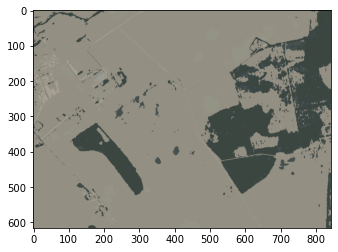

In [7]:
testing=Clusteringtest1(image,4)
plt.imshow(testing)

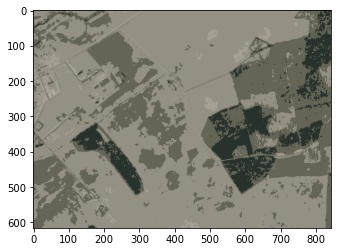

In [8]:
testing=Clusteringtest2(image)
plt.imshow(testing)

In [9]:
def ImageNormalization(image):
    image10=image//75*75
    gray10=cv2.cvtColor(image10,cv2.COLOR_RGB2GRAY)
    return gray10

In [10]:
def Distances(image,posY,posX):
    shaped=image.shape
    distArray=np.zeros((image.shape[0],image.shape[1]))
    for y in range(shaped[0]):
        for x in range(shaped[1]):
            distArray[y][x]=((image[y][x][0]-image[posY][posX][0])**2+(image[y][x][1]-image[posY][posX][1])**2+(image[y][x][2]-image[posY][posX][2])**2)**0.5
    return distArray

In [11]:
def colourSchemeSimplifier(image):
    colours=[[255,0,0],[0,255,0],[0,0,255],[255,255,0],[255,0,255],[0,255,255],[255,255,255],[0,0,0]]
    imageColours=[]
    reColoured=image.copy()
    size=image.shape
    for y in range(size[0]):
        for x in range(size[1]):
            colourAsWord=str(image[y][x][0])+str(image[y][x][1])+str(image[y][x][2])
            if imageColours.count(colourAsWord)==0:
                imageColours.append(colourAsWord)
            position=imageColours.index(colourAsWord)
            if position>=len(colours):
                continue
            else:
                reColoured[y][x]=colours[position]
    return reColoured

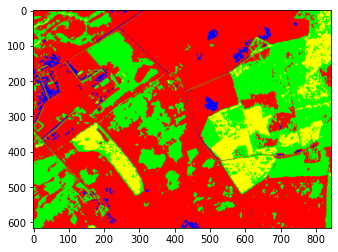

In [12]:
reColoured=colourSchemeSimplifier(testing)
plt.imshow(reColoured)

In [16]:
allColoursCheck={}
for i in range(reColoured.shape[0]):
    for j in range(reColoured.shape[1]):
        normalize=str(reColoured[i][j][0])+str(reColoured[i][j][1])+str(reColoured[i][j][2])
        if normalize not in allColoursCheck:
            allColoursCheck[normalize]=1
        else:
            allColoursCheck[normalize]+=1
allColoursCheck

{'25500': 300763,
 '02550': 160949,
 '00255': 11795,
 '2552550': 45749,
 '2550255': 32}

In [14]:
cv2.imwrite("coloured.png", reColoured)

True